<center>
<h1>Introduction to pythonic solutions to handle ROOT</h1>
<h3>Michela Paganini - Yale University</h3>

<a href='https://github.com/mickypaganini'><i class="fa fa-github"></i>mickypaganini</a> <a href='https://twitter.com/WonderMicky'><i class="fa fa-twitter"></i>WonderMicky</a>

<a href='https://atlas.slac.stanford.edu/events/machine-learning-and-b-tagging'>
<h4>ATLAS Machine Learning and b-Tagging Workshop</h4></a>
</center>


A lot of powerful Machine Learning libraries have Python APIs. These include scikit-learn, Theano, TensorFlow, Keras, PyTorch, Caffe2, etc.

To be able to take advantage of them, we need to turn our samples into ML-friendly format, by extracting information from our `ROOT` files and re-formatting it into `numpy` arrays. 

**This is one of the most important processes in your ML workflow, and you should take extra care setting it up properly for every project before diving into the actual learning. Because this is so important and unique to every application, you should resist the temptation of automating too many of these steps at once.**

---

# Python and NumPy Considerations and External References

There are important considerations on why we love `numpy` in the sciences, but, in my own words, I would simply say that `numpy` is a super powerful, highly optimized library that abstracts away the ugliness of the highly efficient C implementation and provides us with a nice, clean, easy, and intuitive API.

For a nice advanced `numpy` intro, check out this CERN OpenLab tutorial: <a href='https://indico.cern.ch/event/487416/contributions/2174910/attachments/1280846/1902714/LYLWN_present_2016_may_slides.pdf'>Lose your Loops with NumPy</a>.

I won't have time to cover all of this, but there is awesome interactive learning material online, such as <a href='http://ipython-books.github.io/cookbook/'>this</a>, on how `numpy` _"is the cornerstone of the scientific Python software stack"_ and how well it plays with all other data analysis tools. You should absolutely go through this when you can.

For other success stories, check out last week's [#PyCon2017](https://us.pycon.org/2017/about/) presentation: [The Unexpected Effectiveness of Python in Science](https://speakerdeck.com/jakevdp/the-unexpected-effectiveness-of-python-in-science).


# Practical Example

For this tutorial, we'll use a standard b-tagging ntuple. This will help us develop a typical data handling workflow, going from a `ROOT` file to something you can feed into your machine learning model.

## But why can't I just use `ROOT`?

If you want to, you can. You can always 
```python
import ROOT```
and use the usual functions `ROOT` provides you. This is equivalent to writing `ROOT` in your standard C++ environment, so if you're new to Python and have worked for years with regular `ROOT`, this will look very familiar with you. However, this is slowly falling out of favor in light of the much prettier, faster, and more pythonic `root_numpy` interface. Your collaborators will love you much more if you just used `root_numpy` :)

In case you didn't know, `ROOT`'s official Python extension goes by the name of <a href='https://root.cern.ch/pyroot'>`PyROOT`</a>.

In any case, here is an example:

In [4]:
filepath = '../../../pluris/data/group.perf-flavtag.11078446.Akt4EMTo._000001.root'

In [5]:
import ROOT
rootfile = ROOT.TFile(filepath)
roottree = rootfile.Get("bTag_AntiKt4EMTopoJets")

The objects that this creates are standard `ROOT` objects that don't play well with the other tools in the Python ecosystem, so even if you're technically opening a `ROOT` file in Python, you haven't actually achieved much (unless you plan to do your entire analysis using standard `ROOT` tools such as `TMVA`).

In [6]:
rootfile

<ROOT.TFile object ("../../../pluris/data/group.perf-flavtag.11078446.Akt4EMTo._000001.root") at 0x7fb1f8295b80>

In [7]:
roottree

<ROOT.TTree object ("bTag_AntiKt4EMTopoJets") at 0x7fb1f8081150>

But, again, the advantage is that you can now feel comfortable to use all your favorite tools from the `ROOT` syntax you memorized:

In [8]:
%jsroot on 
# JS ROOT is the best thing to have happened to ROOT since ever!!
c = ROOT.TCanvas()
roottree.Draw('jet_pt')
c.Draw()

### `rootpy` digression

> _Python has become the language of choice for high-level applications where fast prototyping and efficient development are important, while glueing together low-level libraries for performance-critical tasks. The PyROOT bindings introduced ROOT into the world of Python, however, interacting with ROOT in Python should not feel like you are still writing C++._

<div align="right">
  The `rootpy` website<br>
  http://www.rootpy.org/
</div>

`rootpy` is the real engine that provided us with the tools to start moving away from the classic `ROOT` environment into a more "data science" friendly world. Thanks [<i class="fa fa-github"></i>ndawe](https://github.com/ndawe)!

`rootpy` is very powerful and covers a lot of use cases. I won't have time to cover everything here, but you can find out more about its many modules here:

* <a href='http://www.rootpy.org/reference/compiled.html'>compiled</a>: Easily compile and load C++ code from multiline Python strings or from external C++ files.
* <a href='http://www.rootpy.org/reference/context.html'>context</a>: Context managers
* <a href='http://www.rootpy.org/reference/interactive.html'>interactive</a>: Interactive plotting
* <a href='http://www.rootpy.org/reference/io.html'>io</a>: ROOT I/O
* [io.pickler](http://www.rootpy.org/reference/io.pickler.html): Pickle python data into a ROOT file, preserving references to ROOT objects
* [logger](http://www.rootpy.org/reference/logger.html): rootpy overrides the default logging class, inserting a check that there exists a default logging handler. If there is not, it adds one. In additon, this can be used to intercept ROOT’s log messages and redirect them through python’s logging subsystem
* [matrix](http://www.rootpy.org/reference/matrix.html): A factory of subclasses of the template classes `ROOT.TMatrixT` and `ROOT.TMatrixTSym`

and lots more

## From ROOT to numpy: `root_numpy`

Very easy to turn your `.root` files into Machine Learning compliant inputs using `numpy` and `root_numpy`.

> <i>`root_numpy` is a Python extension module that provides an efficient interface between ROOT and NumPy. `root_numpy`'s internals are compiled C++ and can therefore handle large amounts of data much faster than equivalent pure Python implementations. With your ROOT data in NumPy form, make use of NumPy's broad library, including fancy indexing, slicing, broadcasting, random sampling, sorting, shape transformations, linear algebra operations, and more. 
</i>

> <i>[...]</i>

> <i>NumPy is the fundamental library of the scientific Python ecosystem. Using NumPy arrays opens up many new possibilities beyond what ROOT offers. Convert your TTrees into NumPy arrays and use `scipy` for numerical integration and optimization, `matplotlib` for plotting, `pandas` for data analysis, `statsmodels` for statistical modelling, `scikit-learn` for machine learning, and perform quick exploratory analysis in a Jupyter notebook.
</i>

<div align="right">
  The `root_numpy` Github README <br>
  https://github.com/scikit-hep/root_numpy
</div>

For reference, here is the full `root_numpy` <a href='http://scikit-hep.org/root_numpy/'>documentation</a>.

In [9]:
import numpy as np
from numpy.lib.recfunctions import stack_arrays
from root_numpy import root2array, root2rec
import glob

Using one single function from `root_numpy`, you can open your `.root` file and turn it into an `ndarray`, a Python object equivalent to an n-dimensional matrix. All you need to do is to pass it the name of the file you'd like to open. Other keyword arguments are specified below.
<img src="./root2array.jpg">

Let's take a look at a b-tagging ntuple:

In [11]:
data = root2array(filepath)

In [12]:
# -- display your newly created object
data

array([ (-0.4932563602924347, -0.5109171271324158, 1.1468302011489868, [array([-1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1], dtype=int32), array([-1, -1,  0, -1, -1, -1, -1], dtype=int32), array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int32), array([ 0,  0, -1, -1, -1, -1,  0, -1, -1], dtype=int32), array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int32), array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int32), array([-1, -1, -1, -1], dtype=int32), array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int32), array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int32)], [-99.0, 0.05189405381679535, -99.0, 0.9306842684745789, -99.0, -99.0, -99.0, -99.0, -99.0], [-99.0, 0.1359800547361374, -99.0, 0.04584725201129913, -99.0, -99.0, -99.0, -99.0, -99.0], [-99.0, 0.8054251074790955, -99.0, 0.014414526522159576, -99.0, -99.0, -99.0, -99.0, -99.0], [-99.0, -2.742166042327881, -99.0, 4.1676836013793945, -99.0, -99.0,

In [13]:
# -- what data type is it?
type(data) 

numpy.ndarray

In [14]:
# -- what are the names of the branches?
branches = data.dtype.names
branches

('PV_jf_x',
 'PV_jf_y',
 'PV_jf_z',
 'jet_trk_jf_Vertex',
 'jet_jf_pb',
 'jet_jf_pc',
 'jet_jf_pu',
 'jet_jf_llr',
 'jet_jf_m',
 'jet_jf_mUncorr',
 'jet_jf_efc',
 'jet_jf_deta',
 'jet_jf_dphi',
 'jet_jf_dRFlightDir',
 'jet_jf_ntrkAtVx',
 'jet_jf_nvtx',
 'jet_jf_sig3d',
 'jet_jf_nvtx1t',
 'jet_jf_n2t',
 'jet_jf_VTXsize',
 'jet_jf_vtx_chi2',
 'jet_jf_vtx_ndf',
 'jet_jf_vtx_ntrk',
 'jet_jf_vtx_L3D',
 'jet_jf_vtx_sig3D',
 'jet_jf_phi',
 'jet_jf_theta',
 'jet_jf_vtx_sigTrans',
 'jet_jf_vtx_x',
 'jet_jf_vtx_x_err',
 'jet_jf_vtx_y',
 'jet_jf_vtx_y_err',
 'jet_jf_vtx_z',
 'jet_jf_vtx_z_err',
 'jet_jf_theta_err',
 'jet_jf_phi_err',
 'nTrk_vtx1',
 'mass_first_vtx',
 'e_first_vtx',
 'e_frac_vtx1',
 'closestVtx_L3D',
 'JF_Lxy1',
 'vtx1_MaxTrkRapidity',
 'vtx1_AvgTrkRapidity',
 'vtx1_MinTrkRapidity',
 'nTrk_vtx2',
 'mass_second_vtx',
 'e_second_vtx',
 'e_frac_vtx2',
 'second_closestVtx_L3D',
 'JF_Lxy2',
 'vtx2_MaxTrkRapidity',
 'vtx2_AvgTrkRapidity',
 'vtx2_MinTrkRapidity',
 'MaxTrkRapidity',
 'Min

In [15]:
# -- how many branches are there?
len(data.dtype.names)

392

In [16]:
# -- how many events are present?
data.shape

(10000,)

_Note_: this way of accessing data does not give you an array of dimensions (n_events, n_variables) because this is a [ragged array](https://en.wikipedia.org/wiki/Jagged_array).

In [17]:
i = 26
data[i] # will access the i^th event (in this case, the 26th)

(-0.49074968695640564, -0.4965721666812897, -23.415054321289062, [array([-1, -1, -1, -1, -1, -1, -1], dtype=int32), array([-1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1], dtype=int32), array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int32), array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int32), array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int32), array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int32), array([-1, -1, -1, -1, -1, -1, -1, -1], dtype=int32)], [-99.0, 0.383921355009079, -99.0, -99.0, -99.0, -99.0, -99.0], [-99.0, 0.15341997146606445, -99.0, -99.0, -99.0, -99.0, -99.0], [-99.0, 0.472097784280777, -99.0, -99.0, -99.0, -99.0, -99.0], [-99.0, -0.20674841105937958, -99.0, -99.0, -99.0, -99.0, -99.0], [-99.0, 2553.181640625, -99.0, -99.0, -99.0, -99.0, -99.0], [-99.0, 350.3334045410156, -99.0, -99.0, -99.0, -99.0, -99.0], [-99.0, 0.28712379932403564, -99.0, -99.

If you want to manipulate only a certain fraction of your data, you can slice your array

In [18]:
# this selects only the first 10 elements
d10 = data[:10]
d10.shape

(10,)

In [19]:
# this selects every other 20 element
de20 = data[::20]
de20.shape

(500,)

In [20]:
# this selects only elements [2, 3, 4]
d_temp = data[[2, 3, 4]]
d_temp.shape

(3,)

This data format still gives you the possibility of accessing branches by name. For example:

In [21]:
data['jet_pt'] # returns an array in which each entry(row) is an array of the pTs of the various jets in that event

array([ array([ 250750.28125   ,  187675.125     ,   54126.24609375,
         46206.078125  ,   30195.875     ,   24175.91992188,
         23985.38867188,   22125.56445312,   21369.6953125 ], dtype=float32),
       array([ 91472.0625    ,  74254.8671875 ,  47141.76171875,  41437.41015625,
        24373.859375  ], dtype=float32),
       array([ 79510.578125  ,  52316.84375   ,  43402.23828125,  29247.1484375 ,
        28250.64648438], dtype=float32),
       ...,
       array([ 140280.8125    ,   39768.0703125 ,   37091.26953125,
         31212.08203125,   26605.671875  ], dtype=float32),
       array([ 76417.1328125 ,  33004.53515625,  29315.71875   ,  21176.2421875 ,
        20952.56640625,  20100.55078125], dtype=float32),
       array([ 75358.2109375 ,  57799.03515625,  40977.29296875,  25375.06445312,
        21090.51171875,  20796.62695312], dtype=float32)], dtype=object)

In [22]:
data['jet_pt'][i] # returns the pt of all jets in event i(=26, from above)

array([ 35775.375     ,  33600.8203125 ,  32269.49414062,  27417.49609375,
        22747.98242188,  21869.69140625,  21362.68554688], dtype=float32)

In [23]:
# This is equivalent to the command above:
data[i]['jet_pt'] # though this wouldn't work for multiple branches (I don't know why)

array([ 35775.375     ,  33600.8203125 ,  32269.49414062,  27417.49609375,
        22747.98242188,  21869.69140625,  21362.68554688], dtype=float32)

Do you want to access more than one branch at a time? No problem! Just pass your request as a list of branch names. For example, let's extract the entire jet 4 vector for each event:

In [24]:
data[['jet_pt', 'jet_eta', 'jet_phi', 'jet_m']][i]

([35775.375, 33600.8203125, 32269.494140625, 27417.49609375, 22747.982421875, 21869.69140625, 21362.685546875], [2.1916868686676025, -0.5575917363166809, -1.9403486251831055, -2.283036708831787, -1.183170199394226, -0.4193796217441559, 0.5197053551673889], [-1.0352786779403687, 1.8716474771499634, 0.5932231545448303, 2.9924240112304688, -3.133082389831543, -2.3837387561798096, 3.0902488231658936], [6307.4873046875, 6646.28564453125, 4647.56103515625, 5416.22900390625, 4770.2001953125, 4694.96728515625, 3935.73974609375])

Just as a reminder, you can access branches by name but also by column number, if you are 100% sure you know what column corresponds to what variable. For example:

In [25]:
four_vectors_ev13 = data[['jet_pt', 'jet_eta', 'jet_phi', 'jet_m']][13] # returns the 4 variables for jets in event 13

In [26]:
four_vectors_ev13['jet_pt'] # returns the jet_pt branch only

array([ 269286.90625   ,  264323.46875   ,  249455.96875   ,
         94288.5546875 ,   84475.0625    ,   64267.6953125 ,
         32297.71289062,   29018.47265625,   28126.86523438,
         25917.78320312], dtype=float32)

In [27]:
four_vectors_ev13[0] # same as above, becaue jet_pt is the 0th branch 
# here 0 represents a column because we have one row only. Be careful with this!

array([ 269286.90625   ,  264323.46875   ,  249455.96875   ,
         94288.5546875 ,   84475.0625    ,   64267.6953125 ,
         32297.71289062,   29018.47265625,   28126.86523438,
         25917.78320312], dtype=float32)

What if you don't want to load an entire dataset in memory to begin with? Well, you can take advantage of all the options `root2array` takes in.

In [31]:
root2array?

For example, import only the events that pass a specific selection (here, the events that have more than 7 jets):

In [37]:
data = root2array(filepath, selection='njets>7')
data.shape

(3289,)

Even more powerful is the fact that you can select which jets to import, based on a condition. For example, here, in all events, for the jet-fitter branches, we only import jets that have a log-likelihood ratio greater than zero:

In [29]:
jet_jf_branches = [b for b in branches if b.startswith('jet_jf_')]
d = root2array(filepath,
           object_selection={'jet_jf_llr>0' : jet_jf_branches})

To make sure it worked, compare the log-likelihood ratios for all jets in the 0th event before (in `data`) versus now (in `d`):

In [30]:
'Before selecting jets: {}'.format(data[0]['jet_jf_llr'])

'Before selecting jets: [-99.          -2.74216604 -99.           4.1676836  -99.         -99.         -99.\n -99.         -99.        ]'

In [31]:
'After selecting jets: {}'.format(d[0]['jet_jf_llr'])

'After selecting jets: [ 4.1676836]'

You can also chunk your trees in a more arbitrary fashion using the `start, stop, step` arguments. For example, say that you only care to load every other event, from event 100 to event 200:

In [32]:
root2array(filepath, start=100, stop=200, step=2).shape

(50,)

As you saw, turning ROOT files into numpy arrays gives you lots of flexibility to access and manipulate your data. But you can get even more flexibility, functionalities, and visual aid using pandas dataframes.

## Pandas Dataframes

In [33]:
import pandas as pd

If you want to manipulate your data (slicing, filtering, removing variables, creating new features, taking operations of branches), I recommend using pandas dataframes, a beatiful and efficient Python data structure library (http://pandas.pydata.org/)

In [38]:
# -- how to turn an ndarray into a pandas dataframe
df = pd.DataFrame(data)

In [39]:
# -- better way of displaying your data
df

,PV_jf_x,PV_jf_y,PV_jf_z,jet_trk_jf_Vertex,jet_jf_pb,jet_jf_pc,jet_jf_pu,jet_jf_llr,jet_jf_m,jet_jf_mUncorr,...,jet_mu_phi,jet_mu_d0,jet_mu_z0,jet_mu_parent_pdgid,jet_mu_ID_qOverP_var,jet_mu_muonType,jet_mu_fatjet_nMu,jet_mu_fatjet_pTmax_pT,jet_mu_fatjet_pTmax_pTrel,jet_mu_fatjet_pTmax_pTrelFrac
0,-0.493256,-0.510917,1.146830,"[[-1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1], ...","[-99.0, 0.0518941, -99.0, 0.930684, -99.0, -99...","[-99.0, 0.13598, -99.0, 0.0458473, -99.0, -99....","[-99.0, 0.805425, -99.0, 0.0144145, -99.0, -99...","[-99.0, -2.74217, -99.0, 4.16768, -99.0, -99.0...","[-99.0, 872.603, -99.0, 2366.29, -99.0, -99.0,...","[-99.0, 139.57, -99.0, 1405.33, -99.0, -99.0, ...",...,"[999.0, -2.54643, 999.0, 999.0, 999.0, 999.0, ...","[0.0, -0.023891, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.206081, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[999.0, 411.0, 999.0, 999.0, 999.0, 999.0, 999...","[0.0, 3.10188e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[999.0, 0.0, 999.0, 999.0, 999.0, 999.0, 999.0...","[0, 1, 0, 0, 0, 0, 0, 0, 0]","[999.0, 28922.0, 999.0, 999.0, 999.0, 999.0, 9...","[999.0, 5.59544, 999.0, 999.0, 999.0, 999.0, 9...","[999.0, 2.98145e-05, 999.0, 999.0, 999.0, 999...."
1,-0.501143,-0.509640,-38.492538,"[[-1, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1...","[0.589221, 0.349599, -99.0, -99.0, -99.0, -99....","[0.35066, 0.342243, -99.0, -99.0, -99.0, -99.0...","[0.0826537, 0.228927, -99.0, -99.0, -99.0, -99...","[1.96414, 0.423382, -99.0, -99.0, -99.0, -99.0...","[2058.43, 902.681, -99.0, -99.0, -99.0, -99.0,...","[671.804, 687.37, -99.0, -99.0, -99.0, -99.0, ...",...,"[999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999...","[999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999...","[999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999..."
2,-0.491789,-0.515855,-2.552142,"[[1, 0, 0, -1, 0, -1, -1, -1, 2, -1, -1, -1, 0...","[0.985496, -99.0, -99.0, 0.682488, 0.303328, -...","[0.00791597, -99.0, -99.0, 0.161226, 0.234968,...","[0.00173502, -99.0, -99.0, 0.211759, 0.431398,...","[6.34213, -99.0, -99.0, 1.1703, -0.352214, -99...","[4718.54, -99.0, -99.0, 1745.59, 899.421, -99....","[3329.05, -99.0, -99.0, 1360.91, 542.546, -99....",...,"[999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999...","[999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999...","[999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999..."
3,-0.482039,-0.492613,51.821114,"[[0, -1, 0, -1, 0, 0, -1, -1, -1, -1, -1, -1, ...","[0.482528, -99.0, 0.0206156, -99.0, 0.98527, -...","[0.272585, -99.0, 0.0779774, -99.0, 0.00813507...","[0.316092, -99.0, 0.89595, -99.0, 0.00133416, ...","[0.423005, -99.0, -3.77184, -99.0, 6.60461, -9...","[4225.62, -99.0, 8958.56, -99.0, 3533.38, -99....","[1919.75, -99.0, 139.57, -99.0, 2881.09, -99.0...",...,"[999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999...","[999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999...","[999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999..."
4,-0.494028,-0.504034,-16.610428,"[[0, -1, 0, -1, -1, 0, 1, 2, -1, 1, -1, -1, -1...","[0.892685, 0.

In [40]:
# -- check the shape: it should be [nb_events, nb_variables]
df.shape

(3289, 392)

To summarize, if you want to go directly from `.root` files to pandas dataframes, you can do so in 3 lines of Python code. I like to use this function below in all my application whenever I load in data from a `ROOT` file. Feel free to copy it and use it!

In [41]:
def root2pandas(files_path, tree_name, **kwargs):
    '''
    Args:
    -----
        files_path: a string like './data/*.root', for example
        tree_name: a string like 'bTag_AntiKt4EMTopoJets' corresponding to the name of the folder inside the root 
                   file that we want to open
        kwargs: arguments taken by root2array, such as branches to consider, start, stop, step, etc
    Returns:
    --------    
        output_panda: a pandas dataframe like allbkg_df in which all the info from the root file will be stored
    
    Note:
    -----
        if you are working with .root files that contain different branches, you might have to mask your data
        in that case, return pd.DataFrame(ss.data)
    '''
    # -- create list of .root files to process
    files = glob.glob(files_path)
    
    # -- process ntuples into rec arrays
    ss = stack_arrays([root2array(fpath, tree_name, **kwargs).view(np.recarray) for fpath in files])

    try:
        return pd.DataFrame(ss)
    except Exception:
        return pd.DataFrame(ss.data)

In [43]:
# -- usage of root2pandas
df = root2pandas(filepath,
           'bTag_AntiKt4EMTopoJets', stop=100)

We just turned a HEP-specific `ROOT` file into a standard data format that can be used by any ML expert. You can now save your data out to widely accepted data formats such as `HDF5` or even `CSV`, share it with your collaborators from the ML community without them having to learn how to use the ROOT library or other CERN-specific analysis tools.

In [ ]:
# using pandas `to_hdf` and `read_hdf` functions

In [44]:
df.to_hdf('test_pd.h5', 'data')

/usr/local/lib/python2.7/site-packages/pandas/core/generic.py:1138: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->['jet_trk_jf_Vertex', 'jet_jf_pb', 'jet_jf_pc', 'jet_jf_pu', 'jet_jf_llr', 'jet_jf_m', 'jet_jf_mUncorr', 'jet_jf_efc', 'jet_jf_deta', 'jet_jf_dphi', 'jet_jf_dRFlightDir', 'jet_jf_ntrkAtVx', 'jet_jf_nvtx', 'jet_jf_sig3d', 'jet_jf_nvtx1t', 'jet_jf_n2t', 'jet_jf_VTXsize', 'jet_jf_vtx_chi2', 'jet_jf_vtx_ndf', 'jet_jf_vtx_ntrk', 'jet_jf_vtx_L3D', 'jet_jf_vtx_sig3D', 'jet_jf_phi', 'jet_jf_theta', 'jet_jf_vtx_sigTrans', 'jet_jf_vtx_x', 'jet_jf_vtx_x_err', 'jet_jf_vtx_y', 'jet_jf_vtx_y_err', 'jet_jf_vtx_z', 'jet_jf_vtx_z_err', 'jet_jf_theta_err', 'jet_jf_phi_err', 'nTrk_vtx1', 'mass_first_vtx', 'e_first_vtx', 'e_frac_vtx1', 'closestVtx_L3D', 'JF_Lxy1', 'vtx1_MaxTrkRapidity', 'vtx1_AvgTrkRapidity', 'vtx1_MinTrkRapidity', 'nTrk_vtx2', 'mass_second_vtx', 'e_

In [45]:
# -- let's load it back in to make sure it actually worked!
new_df = pd.read_hdf('test_pd.h5', 'data')
new_df

,PV_jf_x,PV_jf_y,PV_jf_z,jet_trk_jf_Vertex,jet_jf_pb,jet_jf_pc,jet_jf_pu,jet_jf_llr,jet_jf_m,jet_jf_mUncorr,...,jet_mu_phi,jet_mu_d0,jet_mu_z0,jet_mu_parent_pdgid,jet_mu_ID_qOverP_var,jet_mu_muonType,jet_mu_fatjet_nMu,jet_mu_fatjet_pTmax_pT,jet_mu_fatjet_pTmax_pTrel,jet_mu_fatjet_pTmax_pTrelFrac
0,-0.493256,-0.510917,1.146830,"[[-1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1], ...","[-99.0, 0.0518941, -99.0, 0.930684, -99.0, -99...","[-99.0, 0.13598, -99.0, 0.0458473, -99.0, -99....","[-99.0, 0.805425, -99.0, 0.0144145, -99.0, -99...","[-99.0, -2.74217, -99.0, 4.16768, -99.0, -99.0...","[-99.0, 872.603, -99.0, 2366.29, -99.0, -99.0,...","[-99.0, 139.57, -99.0, 1405.33, -99.0, -99.0, ...",...,"[999.0, -2.54643, 999.0, 999.0, 999.0, 999.0, ...","[0.0, -0.023891, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.206081, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[999.0, 411.0, 999.0, 999.0, 999.0, 999.0, 999...","[0.0, 3.10188e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[999.0, 0.0, 999.0, 999.0, 999.0, 999.0, 999.0...","[0, 1, 0, 0, 0, 0, 0, 0, 0]","[999.0, 28922.0, 999.0, 999.0, 999.0, 999.0, 9...","[999.0, 5.59544, 999.0, 999.0, 999.0, 999.0, 9...","[999.0, 2.98145e-05, 999.0, 999.0, 999.0, 999...."
1,-0.496583,-0.504840,-38.848740,"[[-1, 0, 1, 1, 0, 0, -1, -1, -1, -1], [-1, -1,...","[0.981215, 0.11079, -99.0, 0.377102, 0.0147868]","[0.0091653, 0.178645, -99.0, 0.0478705, 0.0235...","[0.00575483, 0.711489, -99.0, 0.599366, 0.944833]","[5.13875, -1.85973, -99.0, -0.463356, -4.15727]","[3740.23, 681.722, -99.0, 2934.38, 322.982]","[2329.17, 139.57, -99.0, 139.57, 311.904]",...,"[999.0, 999.0, 999.0, 999.0, 999.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[0, 0, 0, 0, 0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[999.0, 999.0, 999.0, 999.0, 999.0]"
2,-0.503697,-0.503970,-11.959317,"[[-1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -...","[0.0237336, 0.0406026, 0.120164, -99.0, -99.0]","[0.0925063, 0.0614678, 0.188967, -99.0, -99.0]","[0.874925, 0.888221, 0.693709, -99.0, -99.0]","[-3.60725, -3.08539, -1.75319, -99.0, -99.0]","[297.572, 559.325, 537.96, -99.0, -99.0]","[139.57, 338.423, 139.57, -99.0, -99.0]",...,"[999.0, 0.708748, 999.0, 999.0, 999.0]","[0.0, -0.0125413, 0.0, 0.0, 0.0]","[0.0, -0.0197916, 0.0, 0.0, 0.0]","[999.0, -511.0, 999.0, 999.0, 999.0]","[0.0, 7.64488e-14, 0.0, 0.0, 0.0]","[999.0, 0.0, 999.0, 999.0, 999.0]","[0, 2, 0, 0, 0]","[999.0, 67636.3, 999.0, 999.0, 999.0]","[999.0, 2.98651, 999.0, 999.0, 999.0]","[999.0, 5.70851e-05, 999.0, 999.0, 999.0]"
3,-0.497647,-0.493103,-25.896772,"[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1...","[-99.0, 0.454163, -99.0, -99.0, -99.0]","[-99.0, 0.344403, -99.0, -99.0, -99.0]","[-99.0, 0.164767, -99.0, -99.0, -99.0]","[-99.0, 1.01393, -99.0, -99.0, -99.0]","[-99.0, 1541.18, -99.0, -99.0, -99.0]","[-99.0, 1214.54, -99.0, -99.0, -99.0]",...,"[999.0, 999.0, 999.0, 999.0, 999.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[0, 0, 0, 0, 0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[999.0, 999.0, 999.0, 999.0, 999.0]"
4,-0.500950,-0.490926,-49.949165,"[[-1, -1, -1], [-1, -1, -1, -1, 0, -1, -1, -1,...","[-99.0, 0.0173368, 0.934215, 0.991007, -99.0]","[-99.0, 0.0475935, 0.0510352, 0.00390125, -99.0]","[-99.0, 0.939106, 0.00434913, 0.00769852, -99.0]","[-99.0, -3.9921, 5.36973, 4.85769, -99.0]","[-99.0, 305.453, 2898.48, 3843.42, -99.0]","[-99.0, 139.57, 2063.54, 2361.13, -99.0]",...,"[999.0, 999.0, 999.0, 999.0, 999.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[0, 0, 0, 0, 0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[999.0, 999.0, 999.0, 999.0, 999.0]"
5

In [ ]:
# using `deepdish.io`

In [46]:
# -- save a pandas df to hdf5 (better to first convert it back to ndarray, to be fair)
import deepdish.io as io
io.save('test_deepdish.h5', df) # saving out only the first 100 events, for example

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->['jet_trk_jf_Vertex', 'jet_jf_pb', 'jet_jf_pc', 'jet_jf_pu', 'jet_jf_llr', 'jet_jf_m', 'jet_jf_mUncorr', 'jet_jf_efc', 'jet_jf_deta', 'jet_jf_dphi', 'jet_jf_dRFlightDir', 'jet_jf_ntrkAtVx', 'jet_jf_nvtx', 'jet_jf_sig3d', 'jet_jf_nvtx1t', 'jet_jf_n2t', 'jet_jf_VTXsize', 'jet_jf_vtx_chi2', 'jet_jf_vtx_ndf', 'jet_jf_vtx_ntrk', 'jet_jf_vtx_L3D', 'jet_jf_vtx_sig3D', 'jet_jf_phi', 'jet_jf_theta', 'jet_jf_vtx_sigTrans', 'jet_jf_vtx_x', 'jet_jf_vtx_x_err', 'jet_jf_vtx_y', 'jet_jf_vtx_y_err', 'jet_jf_vtx_z', 'jet_jf_vtx_z_err', 'jet_jf_theta_err', 'jet_jf_phi_err', 'nTrk_vtx1', 'mass_first_vtx', 'e_first_vtx', 'e_frac_vtx1', 'closestVtx_L3D', 'JF_Lxy1', 'vtx1_MaxTrkRapidity', 'vtx1_AvgTrkRapidity', 'vtx1_MinTrkRapidity', 'nTrk_vtx2', 'mass_second_vtx', 'e_seco

In [47]:
io.load('test_deepdish.h5')

,PV_jf_x,PV_jf_y,PV_jf_z,jet_trk_jf_Vertex,jet_jf_pb,jet_jf_pc,jet_jf_pu,jet_jf_llr,jet_jf_m,jet_jf_mUncorr,...,jet_mu_phi,jet_mu_d0,jet_mu_z0,jet_mu_parent_pdgid,jet_mu_ID_qOverP_var,jet_mu_muonType,jet_mu_fatjet_nMu,jet_mu_fatjet_pTmax_pT,jet_mu_fatjet_pTmax_pTrel,jet_mu_fatjet_pTmax_pTrelFrac
0,-0.493256,-0.510917,1.146830,"[[-1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1], ...","[-99.0, 0.0518941, -99.0, 0.930684, -99.0, -99...","[-99.0, 0.13598, -99.0, 0.0458473, -99.0, -99....","[-99.0, 0.805425, -99.0, 0.0144145, -99.0, -99...","[-99.0, -2.74217, -99.0, 4.16768, -99.0, -99.0...","[-99.0, 872.603, -99.0, 2366.29, -99.0, -99.0,...","[-99.0, 139.57, -99.0, 1405.33, -99.0, -99.0, ...",...,"[999.0, -2.54643, 999.0, 999.0, 999.0, 999.0, ...","[0.0, -0.023891, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.206081, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[999.0, 411.0, 999.0, 999.0, 999.0, 999.0, 999...","[0.0, 3.10188e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[999.0, 0.0, 999.0, 999.0, 999.0, 999.0, 999.0...","[0, 1, 0, 0, 0, 0, 0, 0, 0]","[999.0, 28922.0, 999.0, 999.0, 999.0, 999.0, 9...","[999.0, 5.59544, 999.0, 999.0, 999.0, 999.0, 9...","[999.0, 2.98145e-05, 999.0, 999.0, 999.0, 999...."
1,-0.496583,-0.504840,-38.848740,"[[-1, 0, 1, 1, 0, 0, -1, -1, -1, -1], [-1, -1,...","[0.981215, 0.11079, -99.0, 0.377102, 0.0147868]","[0.0091653, 0.178645, -99.0, 0.0478705, 0.0235...","[0.00575483, 0.711489, -99.0, 0.599366, 0.944833]","[5.13875, -1.85973, -99.0, -0.463356, -4.15727]","[3740.23, 681.722, -99.0, 2934.38, 322.982]","[2329.17, 139.57, -99.0, 139.57, 311.904]",...,"[999.0, 999.0, 999.0, 999.0, 999.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[0, 0, 0, 0, 0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[999.0, 999.0, 999.0, 999.0, 999.0]"
2,-0.503697,-0.503970,-11.959317,"[[-1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -...","[0.0237336, 0.0406026, 0.120164, -99.0, -99.0]","[0.0925063, 0.0614678, 0.188967, -99.0, -99.0]","[0.874925, 0.888221, 0.693709, -99.0, -99.0]","[-3.60725, -3.08539, -1.75319, -99.0, -99.0]","[297.572, 559.325, 537.96, -99.0, -99.0]","[139.57, 338.423, 139.57, -99.0, -99.0]",...,"[999.0, 0.708748, 999.0, 999.0, 999.0]","[0.0, -0.0125413, 0.0, 0.0, 0.0]","[0.0, -0.0197916, 0.0, 0.0, 0.0]","[999.0, -511.0, 999.0, 999.0, 999.0]","[0.0, 7.64488e-14, 0.0, 0.0, 0.0]","[999.0, 0.0, 999.0, 999.0, 999.0]","[0, 2, 0, 0, 0]","[999.0, 67636.3, 999.0, 999.0, 999.0]","[999.0, 2.98651, 999.0, 999.0, 999.0]","[999.0, 5.70851e-05, 999.0, 999.0, 999.0]"
3,-0.497647,-0.493103,-25.896772,"[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1...","[-99.0, 0.454163, -99.0, -99.0, -99.0]","[-99.0, 0.344403, -99.0, -99.0, -99.0]","[-99.0, 0.164767, -99.0, -99.0, -99.0]","[-99.0, 1.01393, -99.0, -99.0, -99.0]","[-99.0, 1541.18, -99.0, -99.0, -99.0]","[-99.0, 1214.54, -99.0, -99.0, -99.0]",...,"[999.0, 999.0, 999.0, 999.0, 999.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[0, 0, 0, 0, 0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[999.0, 999.0, 999.0, 999.0, 999.0]"
4,-0.500950,-0.490926,-49.949165,"[[-1, -1, -1], [-1, -1, -1, -1, 0, -1, -1, -1,...","[-99.0, 0.0173368, 0.934215, 0.991007, -99.0]","[-99.0, 0.0475935, 0.0510352, 0.00390125, -99.0]","[-99.0, 0.939106, 0.00434913, 0.00769852, -99.0]","[-99.0, -3.9921, 5.36973, 4.85769, -99.0]","[-99.0, 305.453, 2898.48, 3843.42, -99.0]","[-99.0, 139.57, 2063.54, 2361.13, -99.0]",...,"[999.0, 999.0, 999.0, 999.0, 999.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[0, 0, 0, 0, 0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[999.0, 999.0, 999.0, 999.0, 999.0]","[999.0, 999.0, 999.0, 999.0, 999.0]"
5

---

Now, let's create a new dataframe that contains only jet-fitter related branches by slicing our pre-existing ttbar dataframe

In [48]:
jf_df = df[[key for key in df.keys() if (key.startswith('jet_jf') and '_vtx_' not in key)]]
jf_df

,jet_jf_pb,jet_jf_pc,jet_jf_pu,jet_jf_llr,jet_jf_m,jet_jf_mUncorr,jet_jf_efc,jet_jf_deta,jet_jf_dphi,jet_jf_dRFlightDir,...,jet_jf_sig3d,jet_jf_nvtx1t,jet_jf_n2t,jet_jf_VTXsize,jet_jf_phi,jet_jf_theta,jet_jf_theta_err,jet_jf_phi_err,jet_jf_ntrk,jet_jf_scaled_efc
0,"[-99.0, 0.0518941, -99.0, 0.930684, -99.0, -99...","[-99.0, 0.13598, -99.0, 0.0458473, -99.0, -99....","[-99.0, 0.805425, -99.0, 0.0144145, -99.0, -99...","[-99.0, -2.74217, -99.0, 4.16768, -99.0, -99.0...","[-99.0, 872.603, -99.0, 2366.29, -99.0, -99.0,...","[-99.0, 139.57, -99.0, 1405.33, -99.0, -99.0, ...","[-99.0, 0.348828, -99.0, 0.874714, -99.0, -99....","[-99.0, -0.028179, -99.0, -0.0851439, -99.0, -...","[-99.0, 0.00829035, -99.0, 0.0309463, -99.0, -...","[-99.0, 0.0146163, -99.0, 0.0626004, -99.0, -9...",...,"[-99.0, 0.474178, -99.0, 11.4624, -99.0, -99.0...","[-1, 1, -1, 0, -1, -1, -1, -1, -1]","[-1, 0, -1, 2, -1, -1, -1, -1, -1]","[1, 1, 0, 1, 0, 0, 0, 0, 0]","[1.87342, -2.55041, 2.49273, 0.303817, 2.32804...","[0.296834, 2.37929, 1.80404, 0.36418, 0.195233...","[0.00111839, 0.0436422, 0.0632399, 0.00405729,...","[0.0583491, 0.0173109, 0.07, 0.00982208, 0.07,...","[1, 1, 0, 3, 0, 0, 0, 0, 0]","[-1.0, 1.74414, -1.0, 1.16628, -1.0, -1.0, -1...."
1,"[0.981215, 0.11079, -99.0, 0.377102, 0.0147868]","[0.0091653, 0.178645, -99.0, 0.0478705, 0.0235...","[0.00575483, 0.711489, -99.0, 0.599366, 0.944833]","[5.13875, -1.85973, -99.0, -0.463356, -4.15727]","[3740.23, 681.722, -99.0, 2934.38, 322.982]","[2329.17, 139.57, -99.0, 139.57, 311.904]","[0.916702, 0.690928, -99.0, 0.075132, 1.0]","[0.00431405, 0.0140479, -99.0, -0.226432, 0.04...","[0.0212308, -0.0625133, -99.0, 0.182741, 0.163...","[0.0271798, 0.0648756, -99.0, 0.464282, 0.0063...",...,"[38.2315, 0.993695, -99.0, 7.0535, 20.0422]","[0, 1, -1, 1, 0]","[6, 0, -1, 4, 3]","[2, 1, 2, 2, 1]","[-3.11436, -0.207189, 2.76526, 0.158441, 0.183...","[1.89628, 2.54657, 2.60509, 1.99089, 0.54282]","[0.0051148, 0.0346115, 0.0159487, 0.0545071, 0...","[0.0012901, 0.0206213, 0.0305337, 0.0168184, 0...","[5, 1, 2, 2, 2]","[1.28338, 1.38186, -1.0, 0.676188, 0.5]"
2,"[0.0237336, 0.0406026, 0.120164, -99.0, -99.0]","[0.0925063, 0.0614678, 0.188967, -99.0, -99.0]","[0.874925, 0.888221, 0.693709, -99.0, -99.0]","[-3.60725, -3.08539, -1.75319, -99.0, -99.0]","[297.572, 559.325, 537.96, -99.0, -99.0]","[139.57, 338.423, 139.57, -99.0, -99.0]","[0.497978, 0.104539, 0.367299, -99.0, -99.0]","[0.00471387, 0.0323902, 0.0180171, -99.0, -99.0]","[0.0107821, -0.031921, 0.0454426, -99.0, -99.0]","[0.00647034, 0.0187766, 0.0313907, -99.0, -99.0]",...,"[0.0535563, 7.16192, 0.445485, -99.0, -99.0]","[1, 2, 1, -1, -1]","[0, 2, 0, -1, -1]","[1, 2, 1, 0, 0]","[-2.56677, 0.636434, -0.70709, -2.6218, -3.2737]","[2.16037, 0.661937, 2.46972, 1.33808, 2.82196]","[0.00816858, 0.000711969, 0.0336153, 0.0632478...","[0.0341333, 0.0026134, 0.0363567, 0.07, 0.0427...","[1, 2, 1, 0, 0]","[1.49393, 0.209079, 1.83649, -1.0, -1.0]"
3,"[-99.0, 0.454163, -99.0, -99.0, -99.0]","[-99.0, 0.344403, -99.0, -99.0, -99.0]","[-99.0, 0.164767, -99.0, -99.0, -99.0]","[-99.0, 1.01393, -99.0, -99.0, -99.0]","[-99.0, 1541.18, -99.0, -99.0, -99.0]","[-99.0, 1214.54, -99.0, -99.0, -99.0]","[-99.0, 1.0, -99.0, -99.0, -99.0]","[-99.0, -0.0103223, -99.0, -99.0, -99.0]","[-99.0, -0.0216278, -99.0, -99.0, -99.0]","[-99.0, 0.0162598, -99.0, -99.0, -99.0]",...,"[-99.0, 40.4443, -99.0, -99.0, -99.0]","[-1, 0, -1, -1, -1]","[-1, 6, -1, -1, -1]","[0, 1, 0, 1, 0]","[2.52839, 2.78523, 1.64314, -0.672032, 0.925327]","[1.80667, 2.95662, 2.67035, 1.39316, 2.18397]","[0.0632002, 0.000281038, 0.0295096, 0.0243288,...","[0.07, 0.00110367, 0.07, 0.00552633, 0.07]","[0, 3, 0, 2, 0]","[-1.0, 1.33333, -1.0, -1.0, -1.0]"
4,"[-99.0, 0.0173368, 0.934215, 0.991007, -99.0]","[-99.0, 0.0475935, 0.0510352, 0.00390125, -99.0]","[-99.0, 0.939106, 0.00434913, 0.00769852, -99.0]","[-99.0, -3.9921, 5.36973, 4.85769, -99.0]","[-99.0, 305.453, 2898.48, 3843.42, -99.0]","[-99.0, 139.57, 2063.54, 2361.13, -99.0]

In [49]:
jf_df.keys()

Index([u'jet_jf_pb', u'jet_jf_pc', u'jet_jf_pu', u'jet_jf_llr', u'jet_jf_m',
       u'jet_jf_mUncorr', u'jet_jf_efc', u'jet_jf_deta', u'jet_jf_dphi',
       u'jet_jf_dRFlightDir', u'jet_jf_ntrkAtVx', u'jet_jf_nvtx',
       u'jet_jf_sig3d', u'jet_jf_nvtx1t', u'jet_jf_n2t', u'jet_jf_VTXsize',
       u'jet_jf_phi', u'jet_jf_theta', u'jet_jf_theta_err', u'jet_jf_phi_err',
       u'jet_jf_ntrk', u'jet_jf_scaled_efc'],
      dtype='object')

This would be useful if you wanted to classify your events only by using the jet-fitter properties of jets in each event. 

But out applications involve classifying jets, not events. In this case, you might want to turn your dataset from event-flat to jet-flat, i.e. a dataframe in which every row represents a jet and every column is a property of this jet. This is extremely easy to do using `pandas` and `numpy`:

In [50]:
def flatten(column):
    '''
    Args:
    -----
        column: a column of a pandas df whose entries are lists (or regular entries -- in which case nothing is done)
                e.g.: my_df['some_variable'] 

    Returns:
    --------    
        flattened out version of the column. 

        For example, it will turn:
        [1791, 2719, 1891]
        [1717, 1, 0, 171, 9181, 537, 12]
        [82, 11]
        ...
        into:
        1791, 2719, 1891, 1717, 1, 0, 171, 9181, 537, 12, 82, 11, ...
    '''
    try:
        return np.array([v for e in column for v in e])
    except (TypeError, ValueError):
        return column

In [53]:
# -- ok, let's try it out!
jf_df_flat = pd.DataFrame({k: flatten(c) for k, c in jf_df.iteritems()})
jf_df_flat[jf_df.keys()]

,jet_jf_pb,jet_jf_pc,jet_jf_pu,jet_jf_llr,jet_jf_m,jet_jf_mUncorr,jet_jf_efc,jet_jf_deta,jet_jf_dphi,jet_jf_dRFlightDir,...,jet_jf_sig3d,jet_jf_nvtx1t,jet_jf_n2t,jet_jf_VTXsize,jet_jf_phi,jet_jf_theta,jet_jf_theta_err,jet_jf_phi_err,jet_jf_ntrk,jet_jf_scaled_efc
0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,...,-99.000000,-1,-1,1,1.873417,0.296834,0.001118,0.058349,1,-1.000000
1,0.051894,0.135980,0.805425,-2.742166,872.603149,139.570175,0.348828,-0.028179,0.008290,0.014616,...,0.474178,1,0,1,-2.550406,2.379291,0.043642,0.017311,1,1.744138
2,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,...,-99.000000,-1,-1,0,2.492729,1.804044,0.063240,0.070000,0,-1.000000
3,0.930684,0.045847,0.014415,4.167684,2366.286377,1405.327515,0.874714,-0.085144,0.030946,0.062600,...,11.462356,0,2,1,0.303817,0.364180,0.004057,0.009822,3,1.166285
4,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,...,-99.000000,-1,-1,0,2.328043,0.195233,0.012610,0.070000,0,-1.000000
5,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,...,-99.000000,-1,-1,0,-1.466923,1.429452,0.064352,0.070000,0,-1.000000
6,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,...,-99.000000,-1,-1,0,1.684852,0.155629,0.010075,0.070000,0,-1.000000
7,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,...,-99.000000,-1,-1,0,-2.220663,2.052422,0.057606,0.070000,0,-1.000000
8,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,...,-99.000000,-1,-1,0,1.558098,1.187019,0.060272,0.070000,0,-1.000000
9,0.981215,0.009165,0.005755,5.138752,3740.229248,2329.174316,0.916702,0.004314,0.021231,0.027180,...,38.231522,0,6,2,-3.114362,1.896280,0.005115,0.001290,5,1.283383


### Plot your data using Matplotlib

Using `pandas` in conjunction with `matplotlib`, you can also inspect your variables super quickly. Check out the following cells for a quick example.

In [54]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
matplotlib.rcParams.update({'font.size': 16})
%matplotlib inline

We can color-code the jets by flavor!

In [55]:
flavor = flatten(df['jet_LabDr_HadF'])
flavor_pids = np.unique(flavor)

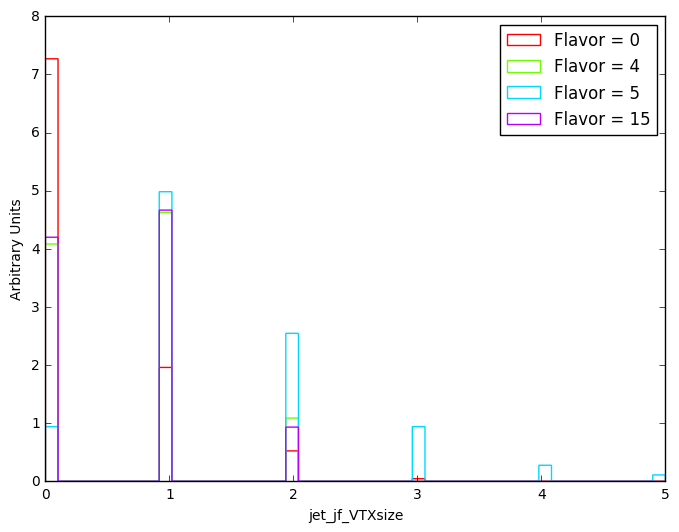

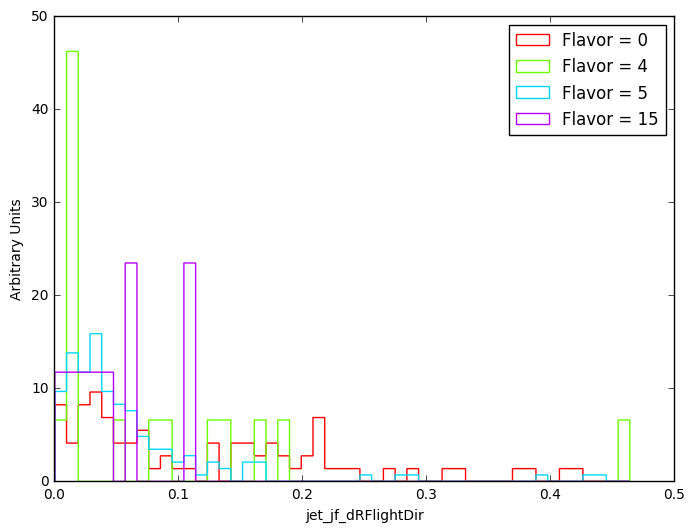

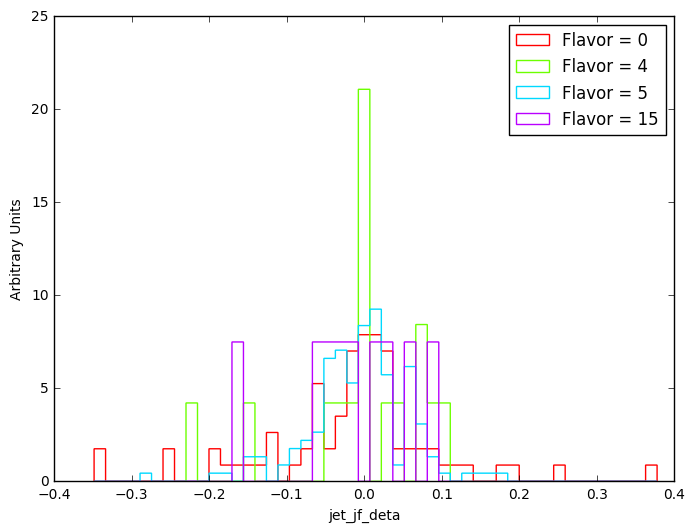

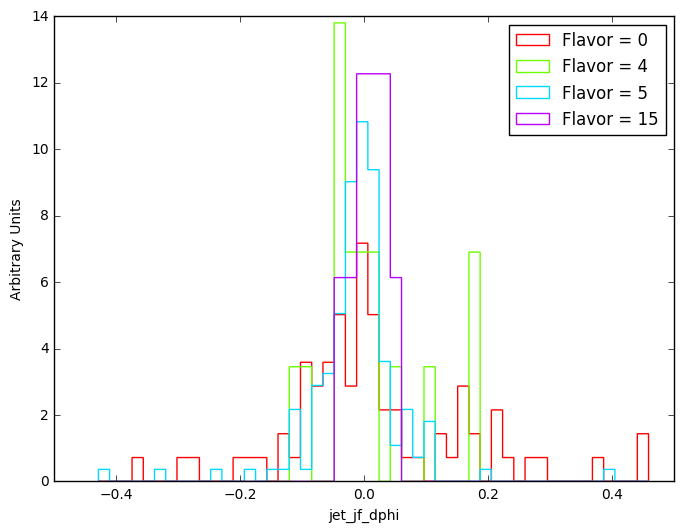

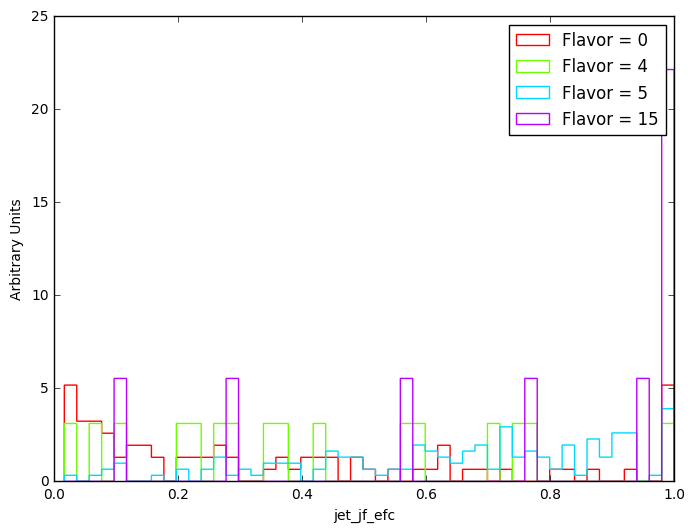

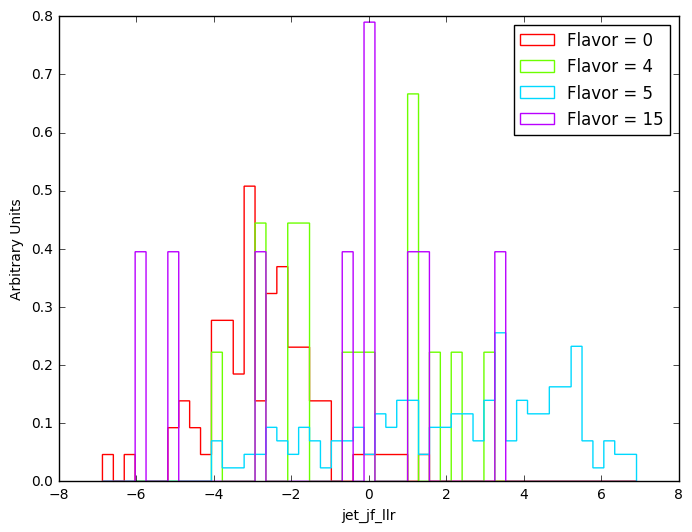

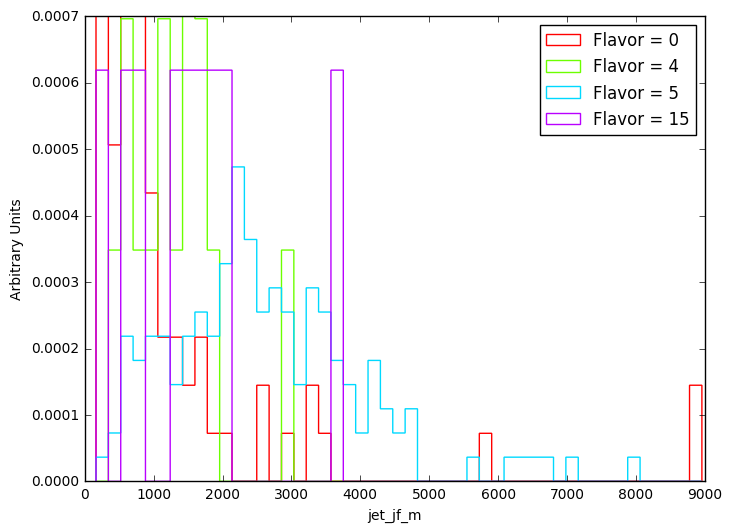

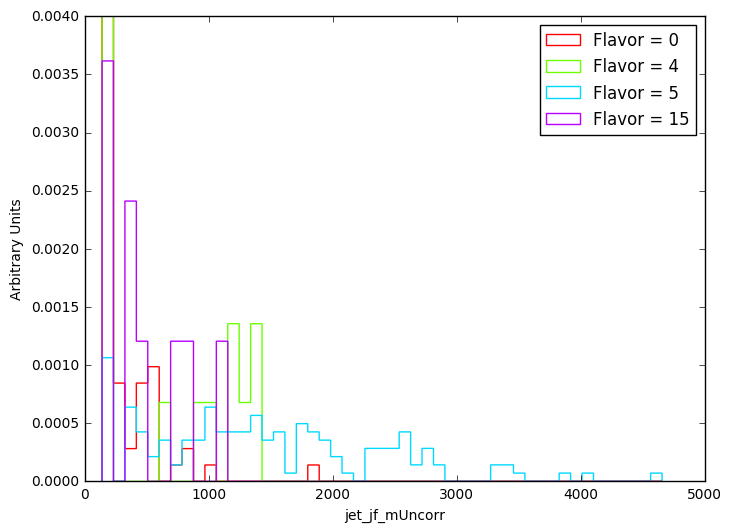

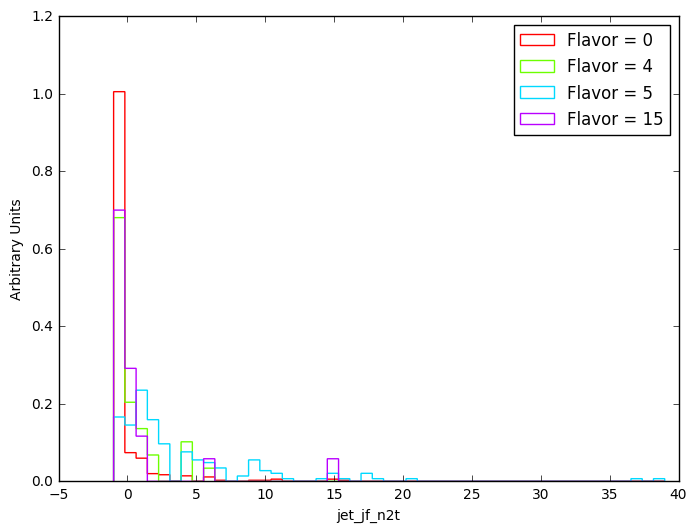

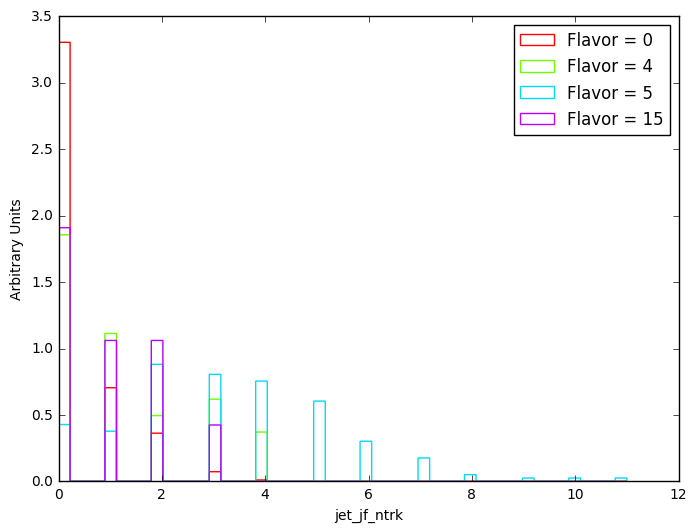

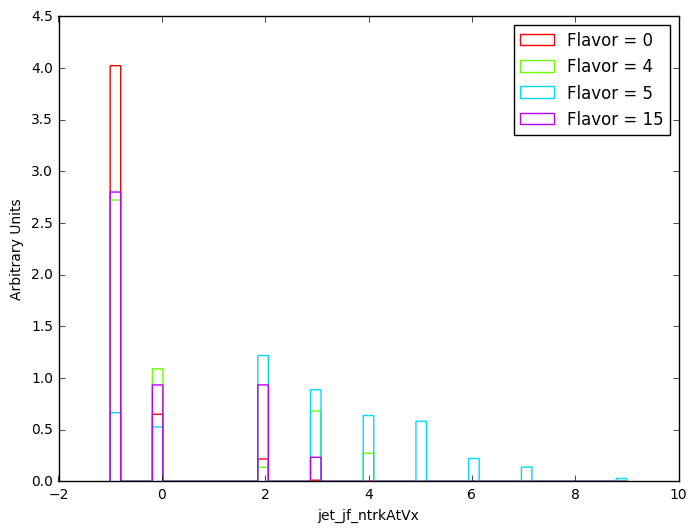

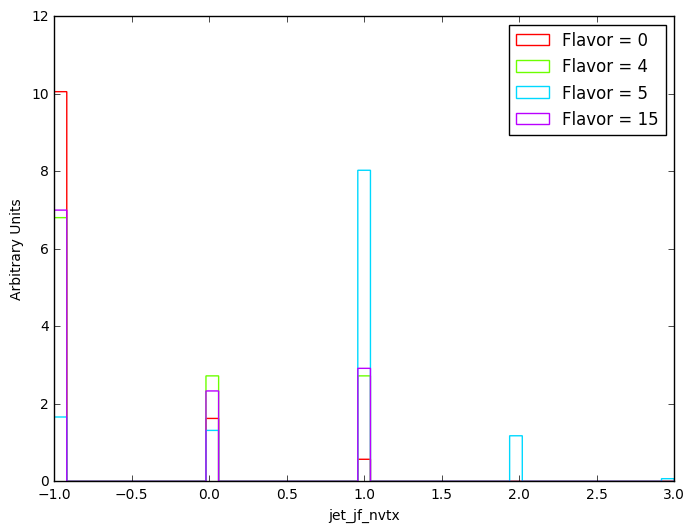

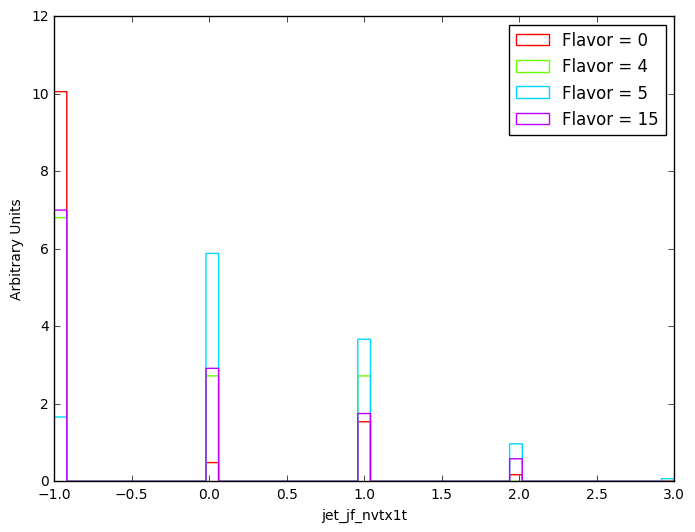

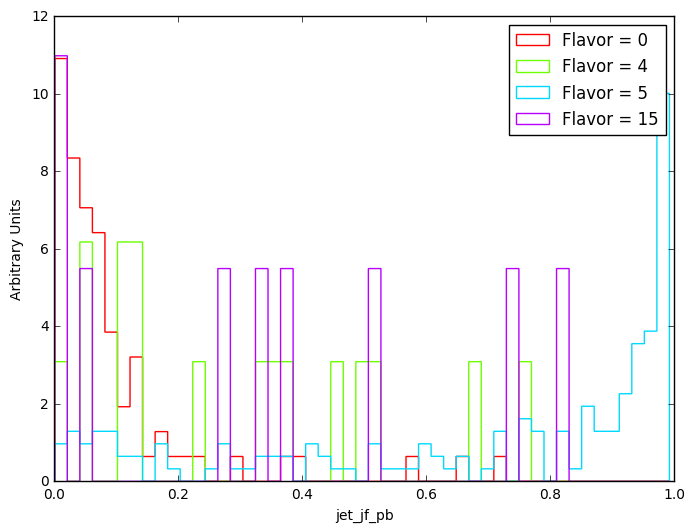

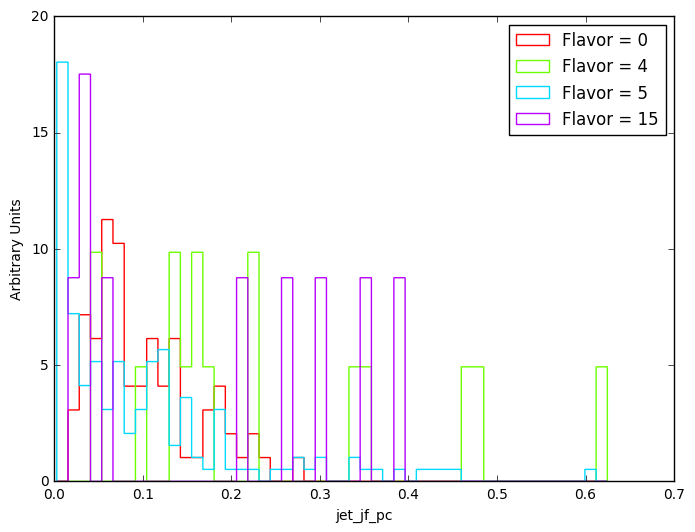

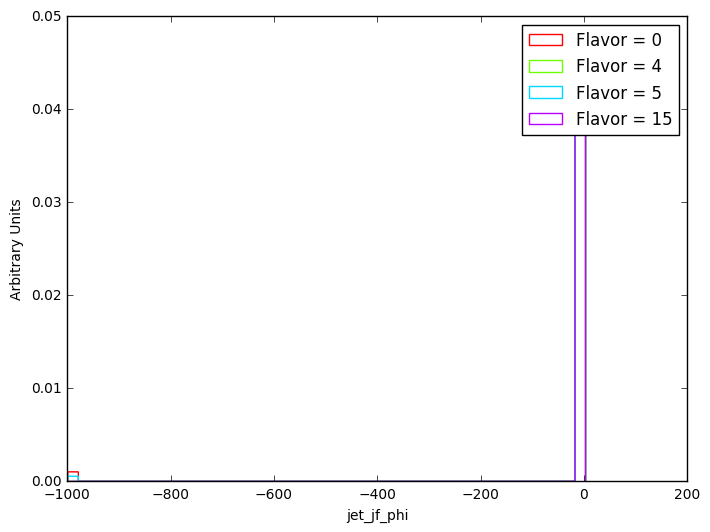

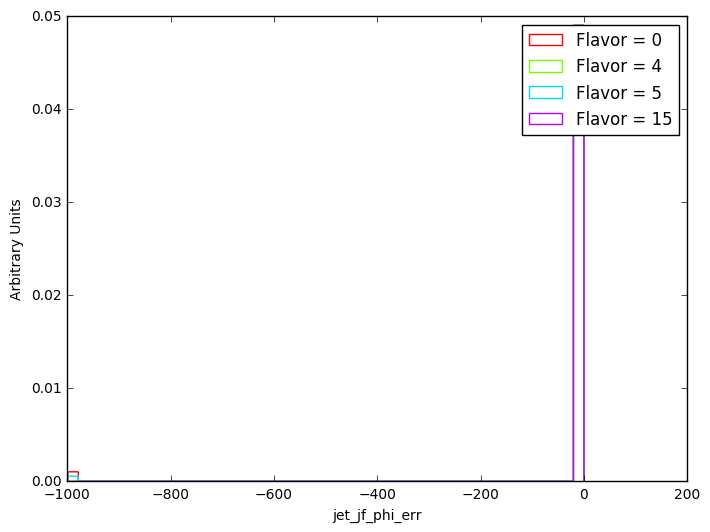

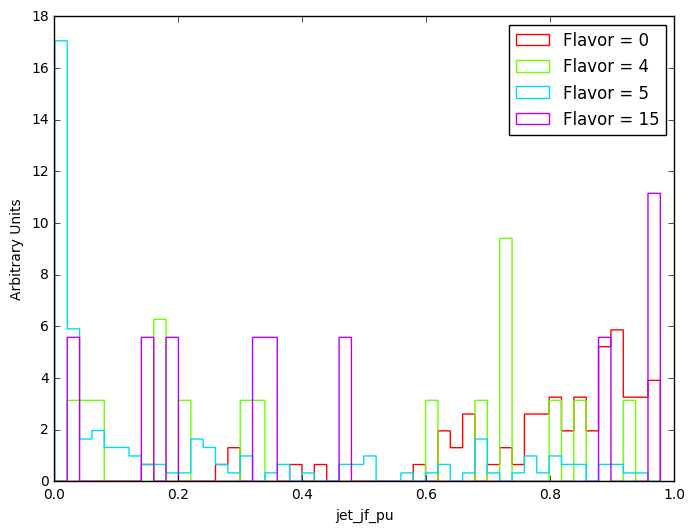

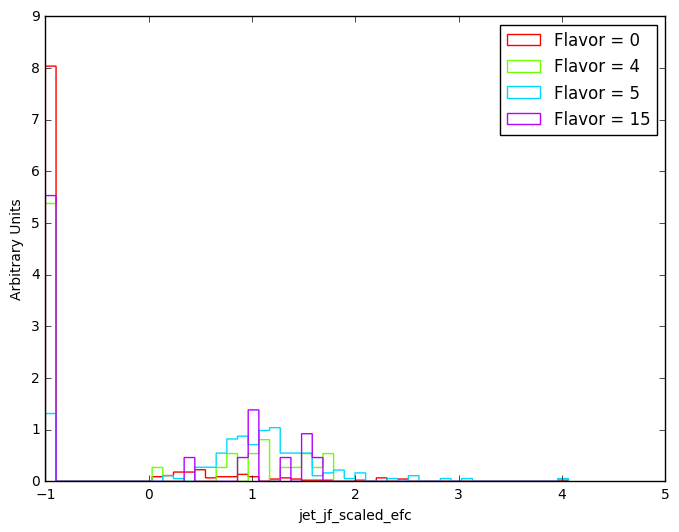

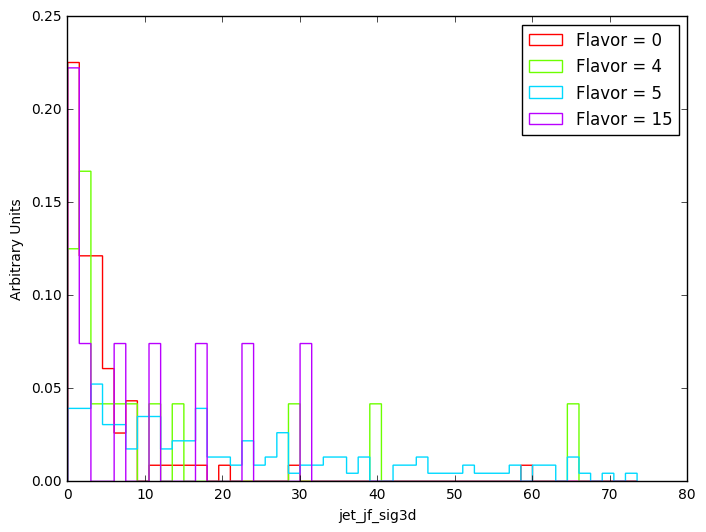

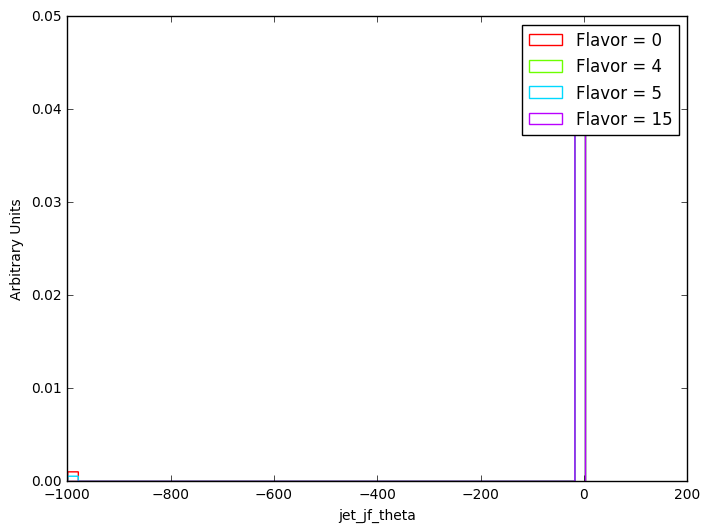

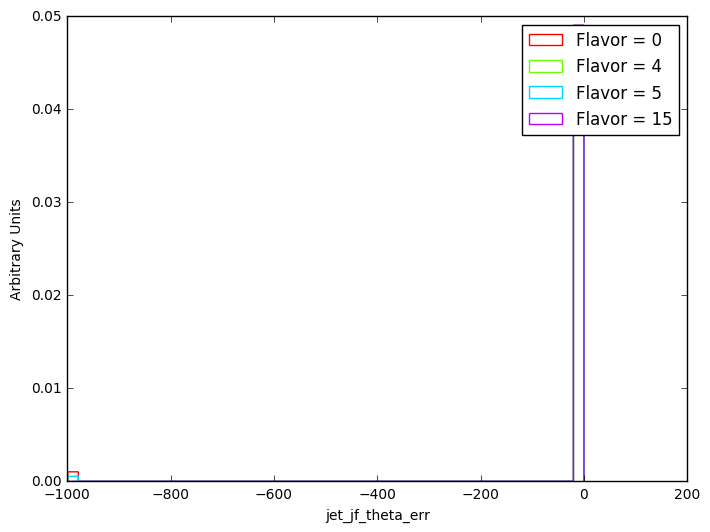

In [57]:
for key in jf_df_flat.keys(): # plot the various variables one by one on different graphs
    
    # set up your figures
    fig = plt.figure(figsize=(8, 6), dpi=100)
    # specify ranges and binning strategies that make sense
    bins = np.linspace(
        min(jf_df_flat[key][jf_df_flat[key]!= -99]), # min
        max(jf_df_flat[key]), # max
        50 # number of bins
    )
    # select your favorite matplotlib color palette
    color = iter(cm.hsv(np.linspace(0, 0.8, len(flavor_pids))))
    # plot the histogram for each flavor using a different color
    for k in flavor_pids:
        c = next(color)
        _ = plt.hist(jf_df_flat[key][flavor == k][jf_df_flat[key]!= -99], 
                    bins=bins, histtype='step', label='Flavor = {}'.format(k), color=c,
                    normed=True)
        
    # prettify your histograms
    plt.xlabel(key)
    plt.ylabel('Arbitrary Units')
    plt.legend()
    plt.show()

It's really easy and intuitive to add new columns to a dataframe. You can also define them as functions of other columns. This is great if you need to build your own hand-crafted variables.

In [58]:
# -- again, you can easily slice dataframes by specifying the names of the branches you would like to select 
df[['jet_pt', 'jet_eta', 'jet_phi', 'jet_m']]

,jet_pt,jet_eta,jet_phi,jet_m
0,"[250750.0, 187675.0, 54126.2, 46206.1, 30195.9...","[1.87173, -0.909275, -0.237527, 1.69887, 2.342...","[1.88309, -2.57472, 2.49273, 0.270926, 2.32804...","[19715.7, 16084.3, 5968.6, 9997.18, 5060.41, 5..."
1,"[91472.1, 74254.9, 47141.8, 41437.4, 24373.9]","[-0.328537, -1.19187, -1.44225, -0.473704, 1.1...","[-3.1049, -0.21435, 2.71813, 0.371802, 0.23775]","[8840.87, 6986.58, 8184.72, 6423.11, 5664.91]"
2,"[79510.6, 52316.8, 43402.2, 29247.1, 28250.6]","[-0.647342, 1.09426, -1.07798, 0.237825, -1.74...","[-2.56826, 0.654105, -0.671689, -2.6218, -3.11...","[7671.78, 6512.99, 8152.5, 6607.17, 5998.7]"
3,"[63225.5, 59211.3, 51443.5, 25335.5, 20113.5]","[-0.240191, -2.37991, -1.44506, 0.153601, -0.6...","[2.52839, 2.78111, 1.64314, -0.592, 0.925327]","[12969.3, 4218.27, 5960.44, 4040.04, 4814.75]"
4,"[148893.0, 128405.0, 102020.0, 58479.6, 36427.9]","[0.923973, 0.349693, 0.609568, 0.841008, -0.99...","[-0.122771, 0.128312, -2.98011, -0.940498, -2....","[13006.5, 9967.58, 14017.8, 8726.12, 2969.28]"
5,"[80044.6, 54971.1, 53228.1, 45157.8, 26325.4, ...","[0.139052, -2.28212, -2.79697, -2.70551, 1.467...","[0.936686, -1.54588, 2.77773, 0.131724, 1.5383...","[10913.9, 4684.09, 8013.73, 7253.5, 6020.78, 2..."
6,"[228104.0, 39301.3, 37811.9, 31712.3, 22208.9,...","[1.38136, 2.0135, 0.362126, 2.10272, 2.15526, ...","[-1.331, -1.30379, -2.23214, 2.24836, -2.07184...","[22814.0, 5343.74, 4625.74, 4258.88, 4166.74, ..."
7,"[75130.5, 57502.6, 38999.1, 37197.8, 26741.9, ...","[1.29769, 0.690662, 2.98226, 1.82826, -0.80498...","[-1.23211, 0.744588, 0.712821, -0.356528, -0.2...","[11723.2, 10822.7, 2824.98, 6421.88, 6175.03, ..."
8,"[201190.0, 121387.0, 73922.4, 32121.7, 21544.0]","[0.0836606, 0.482956, -1.04704, 1.47854, 2.36641]","[0.594496, -2.95384, 0.688499, 1.73769, -2.42629]","[11425.6, 5745.62, 8226.52, 5283.93, 2801.99]"
9,"[77043.4, 57298.2, 25563.0]","[-0.323677, -0.821694, 2.04446]","[0.29297, -2.21631, -2.09286]","[10568.2, 10671.5, 5009.08]"


In [59]:
# -- you can for example build four vectors and store them in a new column
from rootpy.vector import LorentzVector
def make_4v(pt, eta, phi, m):
    p = LorentzVector()
    p.SetPtEtaPhiM(pt, eta, phi, m)
    return p

In [60]:
df['jet_4V'] = [map(lambda args: make_4v(*args), zip(pt, eta, phi, m)) for 
                (_, (pt, eta, phi, m)) in df[['jet_pt', 'jet_eta', 'jet_phi', 'jet_m']].iterrows()]

In [61]:
df['jet_4V']

0     [LorentzVector(px=-77041.549729, py=238621.673...
1     [LorentzVector(px=-91410.484272, py=-3355.8282...
2     [LorentzVector(px=-66796.770295, py=-43129.149...
3     [LorentzVector(px=-51706.331462, py=36385.7267...
4     [LorentzVector(px=147772.405291, py=-18233.876...
5     [LorentzVector(px=47423.253660, py=64483.84097...
6     [LorentzVector(px=54176.512741, py=-221576.602...
7     [LorentzVector(px=24961.649025, py=-70862.6167...
8     [LorentzVector(px=166671.622099, py=112684.450...
9     [LorentzVector(px=73760.630983, py=22249.90272...
10    [LorentzVector(px=14332.474846, py=69310.24242...
11    [LorentzVector(px=-121817.497263, py=24697.524...
12    [LorentzVector(px=48595.606952, py=128857.8122...
13    [LorentzVector(px=129638.813005, py=236027.998...
14    [LorentzVector(px=-17276.308382, py=167139.964...
15    [LorentzVector(px=-39427.930756, py=-24500.554...
16    [LorentzVector(px=115778.230515, py=81555.0576...
17    [LorentzVector(px=-113643.214498, py=24099

## I started with PyROOT, how do I recover?

If you're stuck with a `ROOT TTree object`, `root_numpy` can rescue you once again. You can use `tree2array` to turn your `TTree` into a `numpy` array:

In [63]:
from root_numpy import tree2array
arr = tree2array(roottree, stop=100)

In [64]:
arr.shape

(100,)

In [65]:
arr.dtype.names

('PV_jf_x',
 'PV_jf_y',
 'PV_jf_z',
 'jet_trk_jf_Vertex',
 'jet_jf_pb',
 'jet_jf_pc',
 'jet_jf_pu',
 'jet_jf_llr',
 'jet_jf_m',
 'jet_jf_mUncorr',
 'jet_jf_efc',
 'jet_jf_deta',
 'jet_jf_dphi',
 'jet_jf_dRFlightDir',
 'jet_jf_ntrkAtVx',
 'jet_jf_nvtx',
 'jet_jf_sig3d',
 'jet_jf_nvtx1t',
 'jet_jf_n2t',
 'jet_jf_VTXsize',
 'jet_jf_vtx_chi2',
 'jet_jf_vtx_ndf',
 'jet_jf_vtx_ntrk',
 'jet_jf_vtx_L3D',
 'jet_jf_vtx_sig3D',
 'jet_jf_phi',
 'jet_jf_theta',
 'jet_jf_vtx_sigTrans',
 'jet_jf_vtx_x',
 'jet_jf_vtx_x_err',
 'jet_jf_vtx_y',
 'jet_jf_vtx_y_err',
 'jet_jf_vtx_z',
 'jet_jf_vtx_z_err',
 'jet_jf_theta_err',
 'jet_jf_phi_err',
 'nTrk_vtx1',
 'mass_first_vtx',
 'e_first_vtx',
 'e_frac_vtx1',
 'closestVtx_L3D',
 'JF_Lxy1',
 'vtx1_MaxTrkRapidity',
 'vtx1_AvgTrkRapidity',
 'vtx1_MinTrkRapidity',
 'nTrk_vtx2',
 'mass_second_vtx',
 'e_second_vtx',
 'e_frac_vtx2',
 'second_closestVtx_L3D',
 'JF_Lxy2',
 'vtx2_MaxTrkRapidity',
 'vtx2_AvgTrkRapidity',
 'vtx2_MinTrkRapidity',
 'MaxTrkRapidity',
 'Min

et cetera

## Create X, y for Machine Learning

Now, turn your `df` into the desired ndarray $X$ that can be directly used for ML applications using this handy pandas function:

In [66]:
X = jf_df_flat.as_matrix() # I think this is the same as jf_df_flat.values

Finally, generate an array of truth labels $y$ to distinguish among the different classes in the problem. You can use the sklearn [`LabelEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to turn your classes from whatever format they are in -- in this case {0, 4, 5, 15} -- into classes numbered {0, 1, 2, 3}:

In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(flavor)

### Extra Pre-Processing Steps: Shuffling, Splitting into Train-Test, Scaling Inputs

The sklearn function [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) will randomly shuffle and automatically split all your objects into train and test subsets:

In [68]:
from sklearn.model_selection import train_test_split

ix = range(X.shape[0]) # array of indices, just to keep track of them for safety reasons and future checks
X_train, X_test, y_train, y_test, ix_train, ix_test = train_test_split(X, y, ix, train_size=0.6)

It is common practice to scale the inputs to neural nets such that they have approximately similar ranges. Without this step, you might end up with variables whose values span very different orders of magnitude. This will create problems in the NN convergence due to very wild fluctuations in the magnitude of the internal weights. To take care of the scaling, we use the sklearn [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html):

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Summary

In this brief tutorial, you learned how to use `root_numpy` and `pandas` to extract information from ROOT files and transform it in a pythonic way. 

You learned how to slice your data to only contain the branches and objects you are interested in. You should now be able to flatten your dataset from an event-level format to a jet-level (or track-level, or vertex-level) format.

`scikit-learn` helped us shuffle the data, split it randomly into train and test sets with specific proportions, scale the input variables to unit variance and 0 mean, and transform the labels into integer classes.

Now you're ready to go!